In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score #R-squared
from sklearn.model_selection import train_test_split #for train and test split
from statsmodels.api import qqplot 
from scipy.stats import shapiro,ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
full_data_Yerevan = pd.read_excel("cleaned_full_data.xlsx")

In [3]:
full_data_Yerevan

,city,country,district,host_since,host_response_rate,host_identity_verified,review,superhost,property_type,accomodates,number_bathroom,number_bedroom,number_beds,price,cleanliness,accuracy,communication,location,check_in,value
0,Yerevan,Armenia,Ajapniak,2019,100,Identity verified,97,regular host,Entire rental unit,2,1.0,1,1,34,4.7,4.6,4.9,4.7,4.9,4.5
1,Yerevan,Armenia,Ajapniak,2022,100,Identity verified,4,regular host,Entire rental unit,4,1.0,2,2,52,5.0,5.0,5.0,4.0,4.8,5.0
2,Yerevan,Armenia,Ajapniak,2019,100,Identity verified,97,regular host,Entire rental unit,2,1.0,0,1,33,5.0,4.6,4.9,4.5,4.8,4.5
3,Yerevan,Armenia,Ajapniak,2022,100,Identity verified,11,regular host,Entire loft,4,1.0,1,1,40,4.4,5.0,5.0,4.6,4.9,4.4
4,Yerevan,Armenia,Ajapniak,2015,100,Identity not verified,4,regular host,Entire serviced apartment,3,1.0,2,2,25,3.8,4.0,4.0,3.8,4.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,Yerevan,Armenia,Shengavit,2020,100,Identity verified,2,Super host,Entire rental unit Inn Apartments,5,1.0,2,3,11,4.8,4.7,4.9,4.8,4.9,4.7
1523,Yerevan,Armenia,Shengavit,2022,94,Identity verified,31,regular host,Entire rental unit,4,1.0,1,2,43,4.1,4.3,4.6,5.0,4.8,4.4
1524,Yerevan,Armenia,Shengavit,2019,100,Identity verified,21,Super host,Entire home,3,1.0,0,2,36,5.0,4.9,5.0,4.8,5.0,4.8
1525,Yerevan,Armenia,Shengavit,2015,100,Identity verified,75,Super host,Entire serviced apartment,2,1.0,1,1,65,4.7,4.9,4.8,4.9,4.8,5.0


In [4]:
print("Duplicates: Yerevan", full_data_Yerevan.duplicated().sum()) 


Duplicates: Yerevan 185


In [5]:
print("Missing values: Yerevan", full_data_Yerevan.isna().sum().sum())


Missing values: Yerevan 0


In [6]:
full_data_Yerevan.host_since.value_counts()

2020    269
2016    208
2022    204
2019    166
2017    162
2021    149
2018    144
2015     96
2014     56
2013     39
2023     27
2012      7
Name: host_since, dtype: int64

In [7]:
full_data_Yerevan.host_since = 2023 - full_data_Yerevan.host_since

In [8]:
full_data_Yerevan.host_since.value_counts()

3     269
7     208
1     204
4     166
6     162
2     149
5     144
8      96
9      56
10     39
0      27
11      7
Name: host_since, dtype: int64

In [9]:
full_data_Yerevan.host_since 

0       4
1       1
2       4
3       1
4       8
       ..
1522    3
1523    1
1524    4
1525    8
1526    1
Name: host_since, Length: 1527, dtype: int64

In [10]:
full_data_Yerevan.number_bedroom.value_counts()

1    1023
2     253
0     164
3      38
4      32
5       9
8       6
6       1
9       1
Name: number_bedroom, dtype: int64

# Visualization for Yerevan

In [36]:
host_since = full_data_Yerevan.groupby('superhost', as_index=False)['host_since'].mean()
host_since

,superhost,host_since
0,Super host,4.702103
1,regular host,4.225037


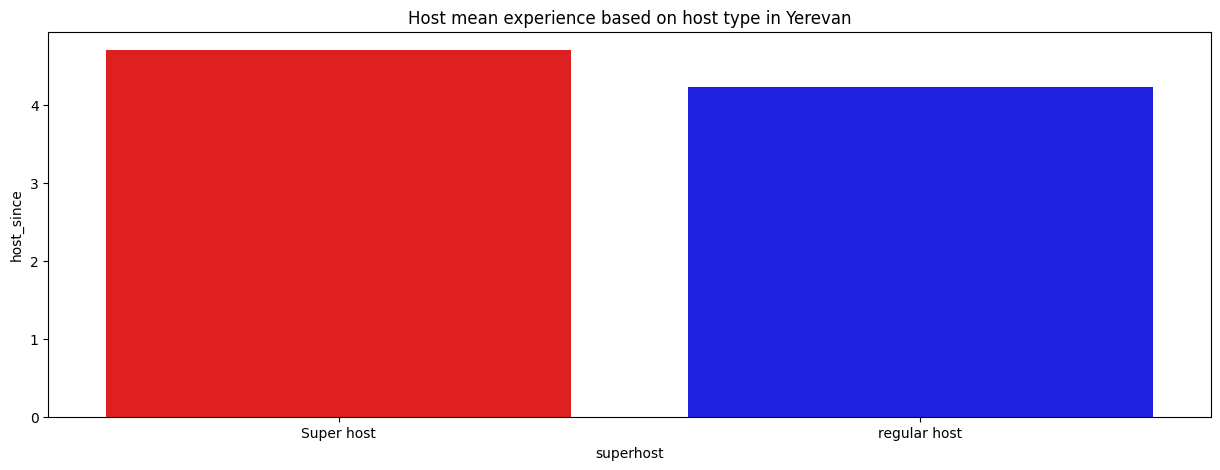

In [39]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'host_since', data = host_since,  palette=color)
plt.title('Host mean experience based on host type in Yerevan')
plt.show()

In [40]:
host_response_rate = full_data_Yerevan.groupby('superhost', as_index=False)['host_response_rate'].mean()
host_response_rate

,superhost,host_response_rate
0,Super host,99.372664
1,regular host,95.031297


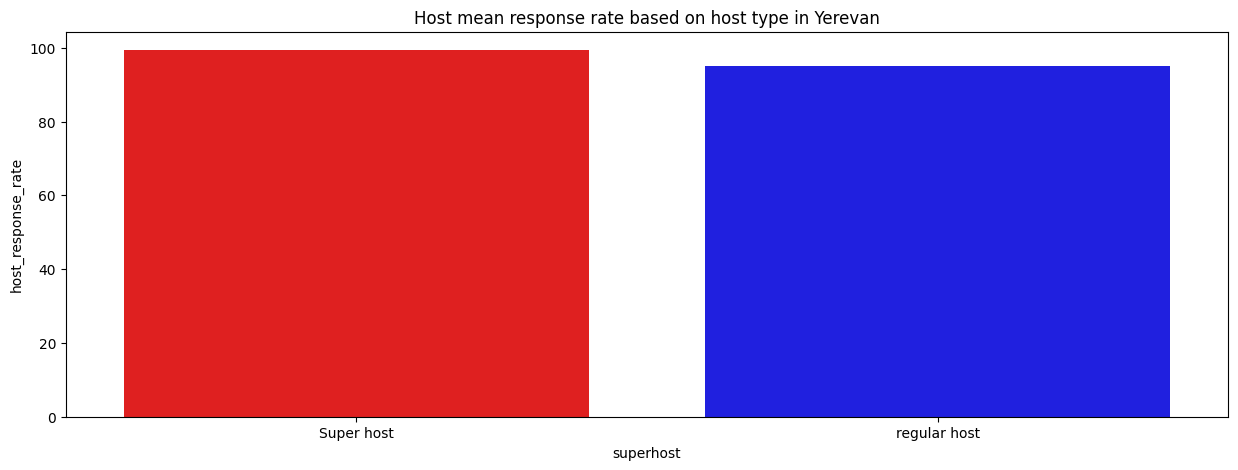

In [41]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'host_response_rate', data = host_response_rate,  palette=color)
plt.title('Host mean response rate based on host type in Yerevan')
plt.show()

In [42]:
review = full_data_Yerevan.groupby('superhost', as_index=False)['review'].mean()
review

,superhost,review
0,Super host,78.898364
1,regular host,76.995529


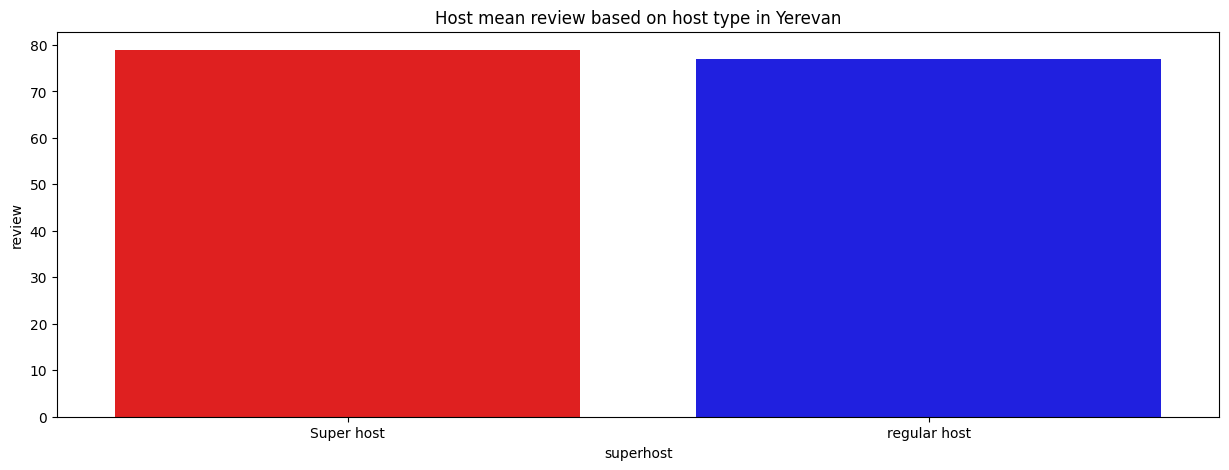

In [43]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'review', data = review,  palette=color)
plt.title('Host mean review based on host type in Yerevan')
plt.show()

In [45]:
accomodates = full_data_Yerevan.groupby('superhost', as_index=False)['accomodates'].mean()
accomodates

,superhost,accomodates
0,Super host,3.260514
1,regular host,3.247392


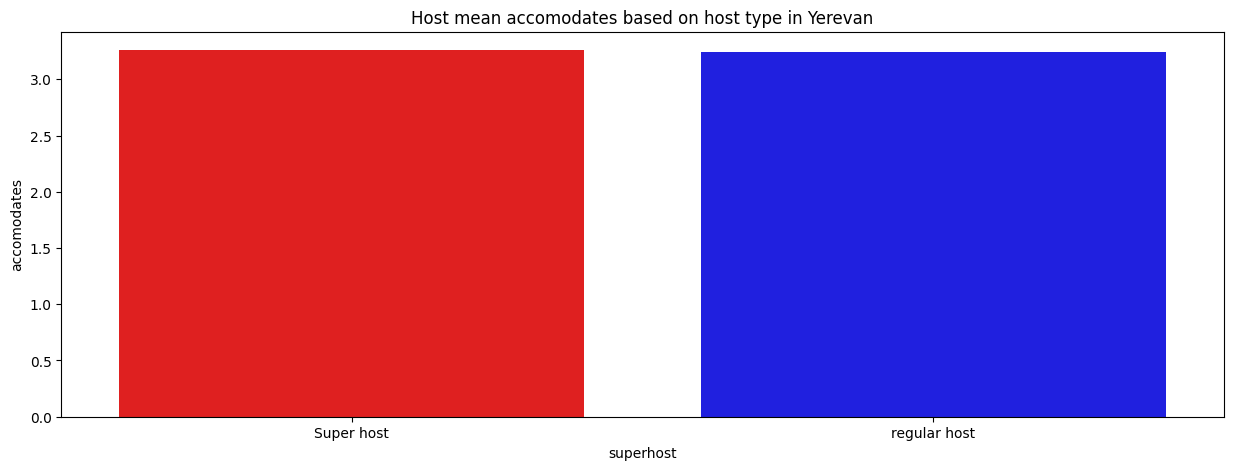

In [46]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'accomodates', data = accomodates,  palette=color)
plt.title('Host mean accomodates based on host type in Yerevan')
plt.show()

In [50]:
number_beds = full_data_Yerevan.groupby('superhost', as_index=False)['number_beds'].mean()
number_beds

,superhost,number_beds
0,Super host,1.898364
1,regular host,2.086438


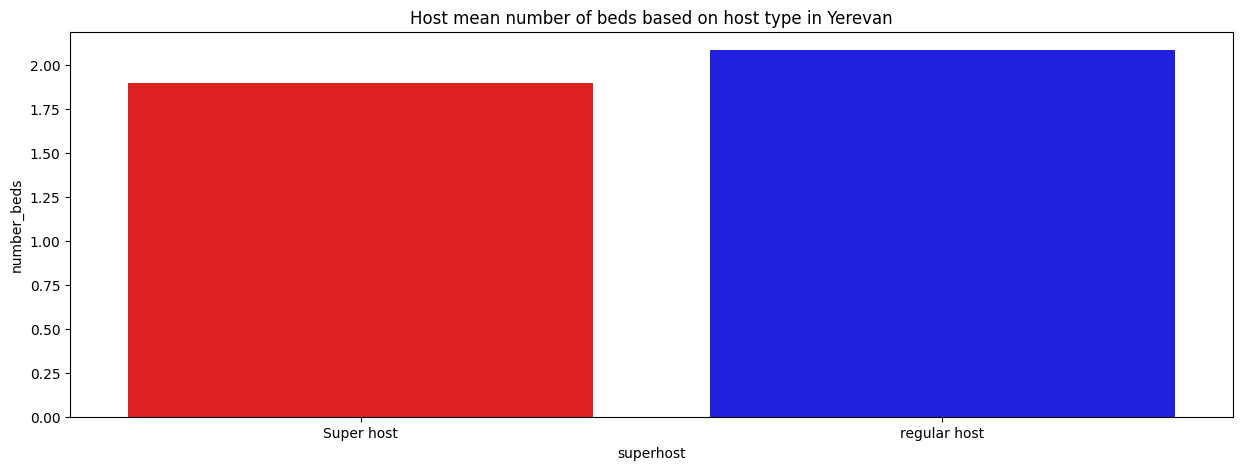

In [51]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'number_beds', data = number_beds,  palette=color)
plt.title('Host mean number of beds based on host type in Yerevan')
plt.show()

In [53]:
price = full_data_Yerevan.groupby('superhost', as_index=False)['price'].mean()
price

,superhost,price
0,Super host,52.688084
1,regular host,48.122206


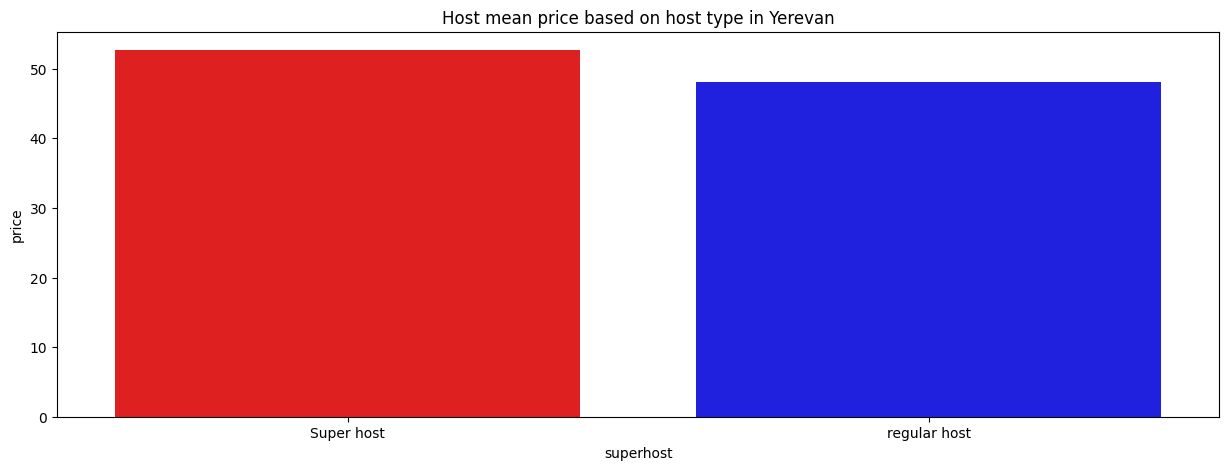

In [54]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'price', data = price,  palette=color)
plt.title('Host mean price based on host type in Yerevan')
plt.show()

In [55]:
cleanliness = full_data_Yerevan.groupby('superhost', as_index=False)['cleanliness'].mean()
cleanliness

,superhost,cleanliness
0,Super host,4.863084
1,regular host,4.772280


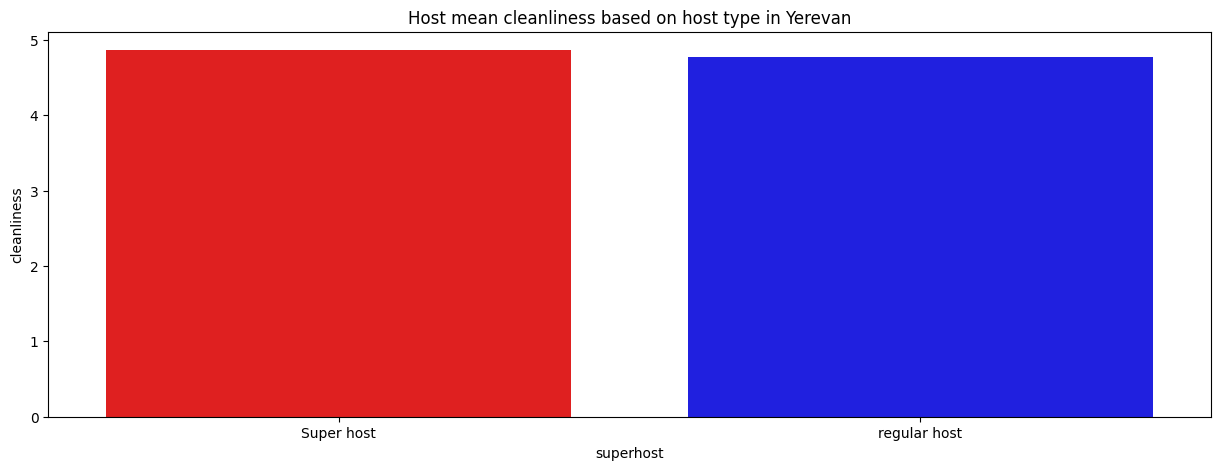

In [57]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'cleanliness', data = cleanliness,  palette=color)
plt.title('Host mean cleanliness based on host type in Yerevan')
plt.show()

In [58]:
accuracy = full_data_Yerevan.groupby('superhost', as_index=False)['accuracy'].mean()
accuracy

,superhost,accuracy
0,Super host,4.908528
1,regular host,4.797168


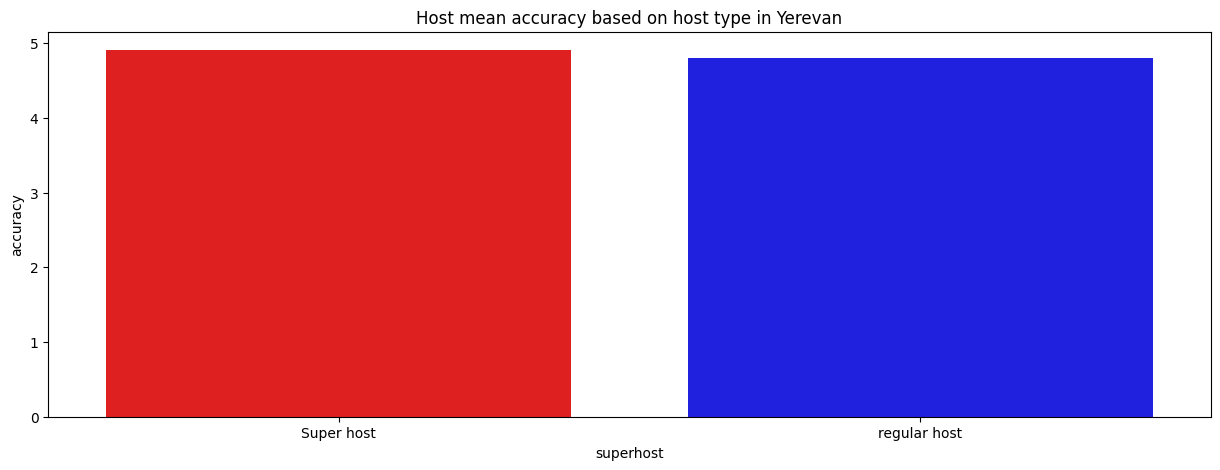

In [60]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'accuracy', data = accuracy,  palette=color)
plt.title('Host mean accuracy based on host type in Yerevan')
plt.show()

In [61]:
communication = full_data_Yerevan.groupby('superhost', as_index=False)['communication'].mean()
communication

,superhost,communication
0,Super host,4.940771
1,regular host,4.893443


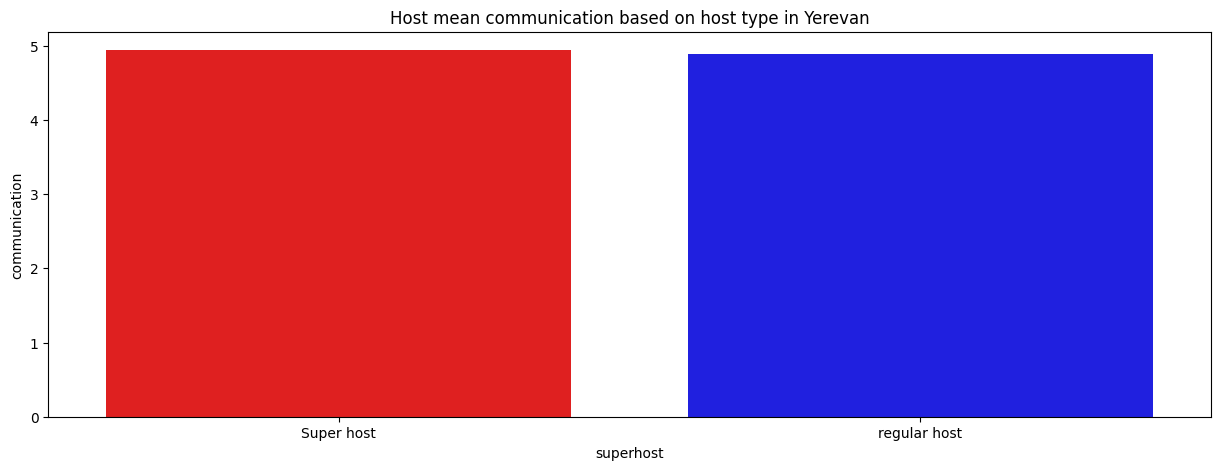

In [62]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'communication', data = communication,  palette=color)
plt.title('Host mean communication based on host type in Yerevan')
plt.show()

In [63]:
location = full_data_Yerevan.groupby('superhost', as_index=False)['location'].mean()
location

,superhost,location
0,Super host,4.848364
1,regular host,4.721908


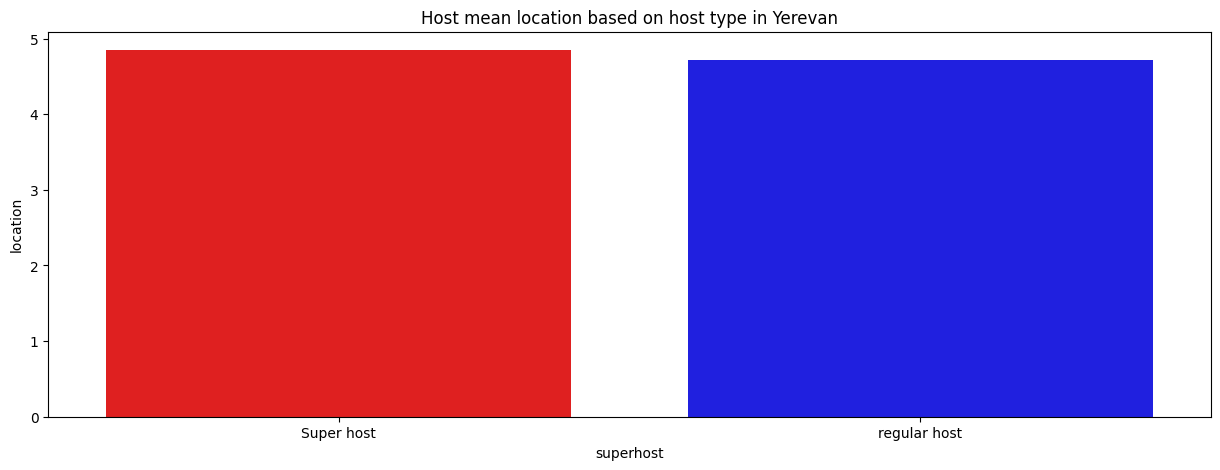

In [64]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'location', data = location,  palette=color)
plt.title('Host mean location based on host type in Yerevan')
plt.show()

In [65]:
check_in = full_data_Yerevan.groupby('superhost', as_index=False)['check_in'].mean()
check_in

,superhost,check_in
0,Super host,4.930607
1,regular host,4.850671


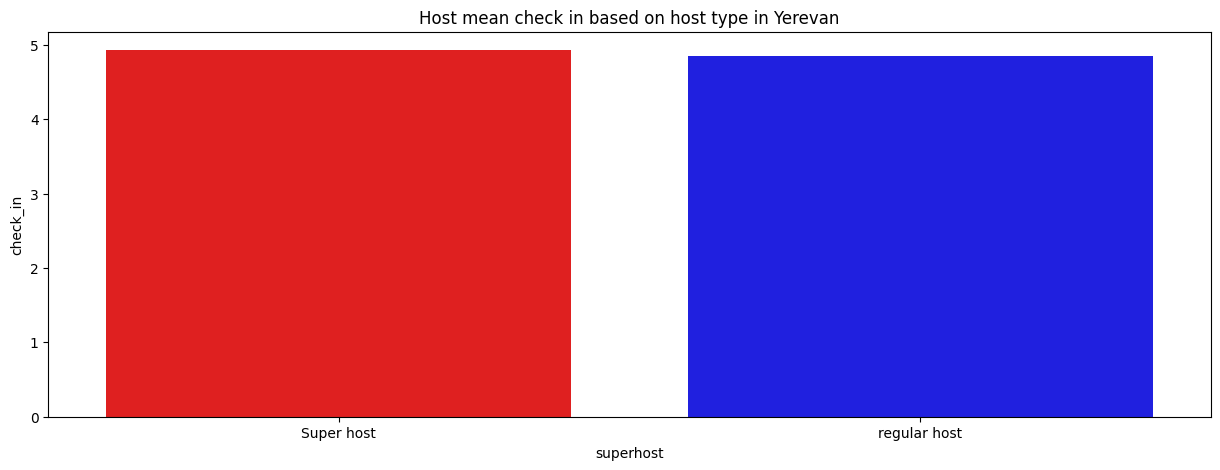

In [66]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'check_in', data = check_in,  palette=color)
plt.title('Host mean check in based on host type in Yerevan')
plt.show()

In [67]:
value = full_data_Yerevan.groupby('superhost', as_index=False)['value'].mean()
value

,superhost,value
0,Super host,4.793692
1,regular host,4.686736


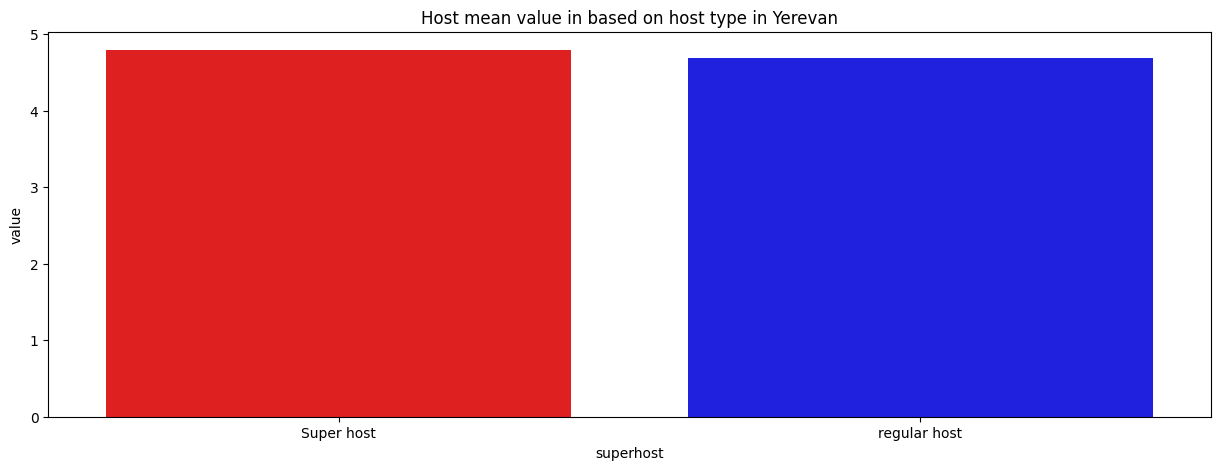

In [68]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'superhost', y = 'value', data = value,  palette=color)
plt.title('Host mean value in based on host type in Yerevan')
plt.show()

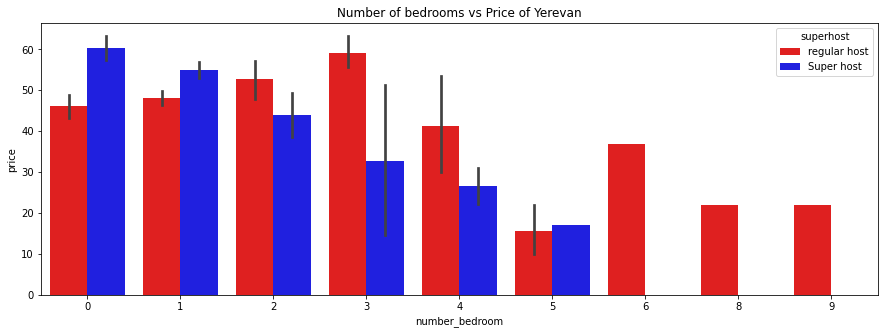

In [23]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
color = ['red','blue']
sns.barplot(x = 'number_bedroom', y = 'price', hue = 'superhost', data = full_data_Yerevan, palette=color)
plt.title('Number of bedrooms vs Price of Yerevan')
plt.show()

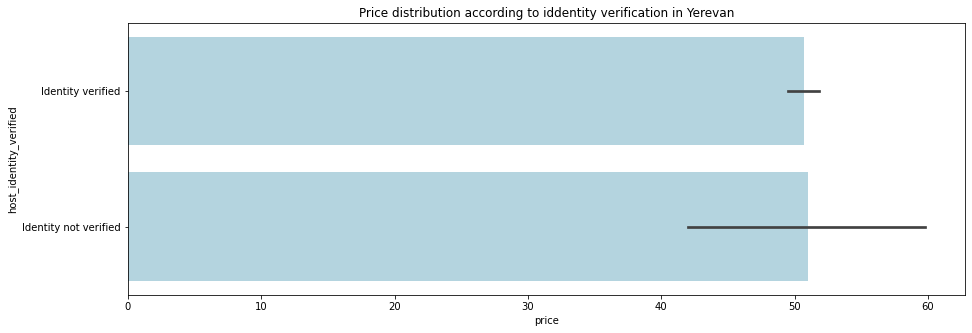

In [26]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'price', y = 'host_identity_verified', data = full_data_Yerevan, color = 'lightblue')
plt.title('Price distribution according to iddentity verification in Yerevan')
plt.show()

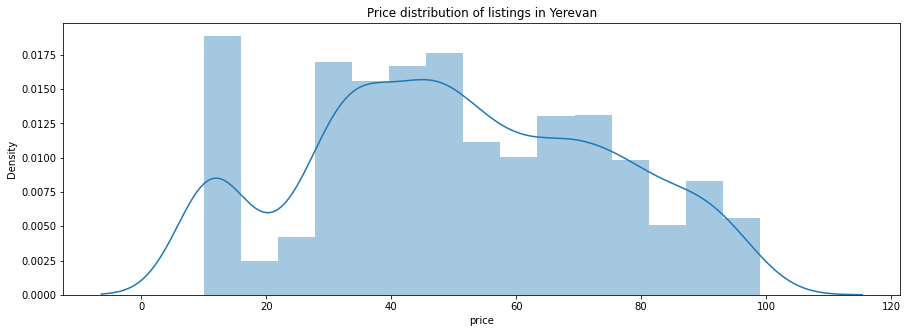

In [40]:
plt.figure(figsize = (15,5))
sns.distplot(full_data_Yerevan.price)
plt.title('Price distribution of listings in Yerevan')
plt.show()

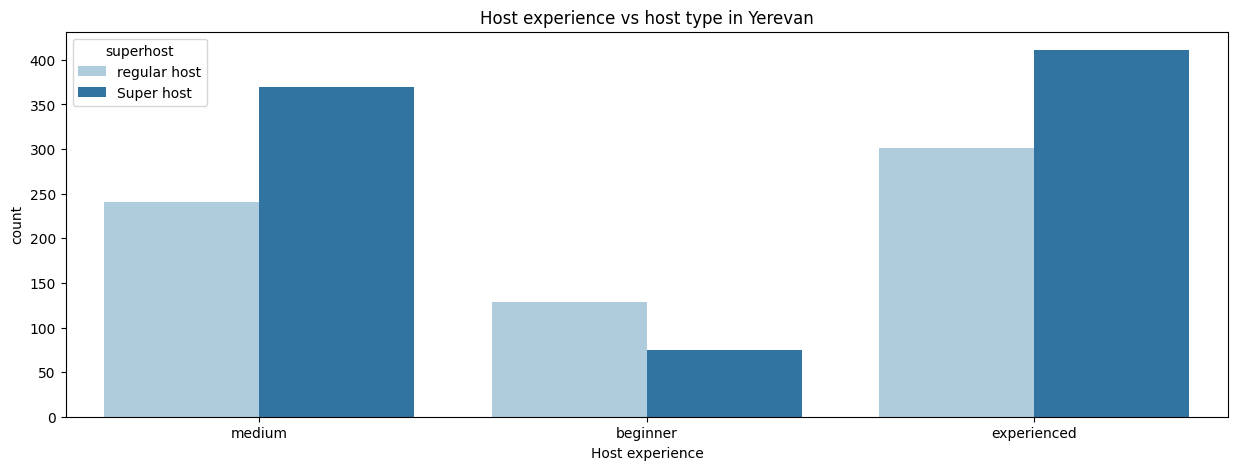

In [12]:
plt.figure(figsize = (15,5))
count = sns.countplot(x = full_data_Yerevan.host_experience, hue = 'superhost', data=full_data_Yerevan, palette='Paired')
count.set(xlabel = 'Host experience')
plt.title('Host experience vs host type in Yerevan');

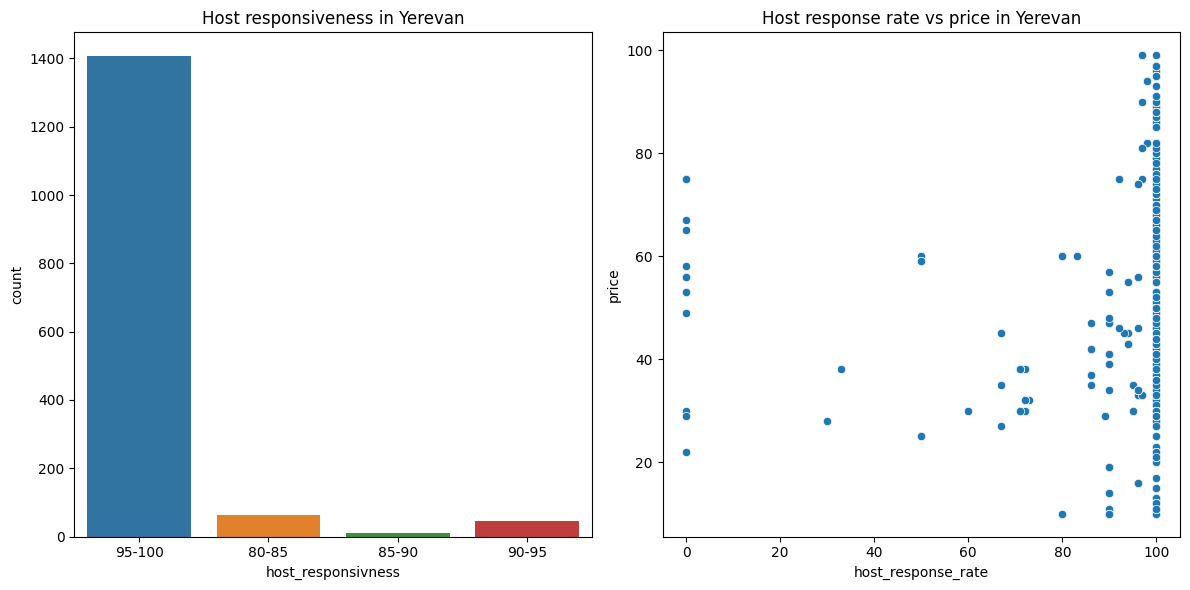

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the count plot
sns.countplot(data=full_data_Yerevan, x='host_responsivness', ax=ax1)
ax1.set_title('Host responsiveness in Yerevan')

# Plot the scatter plot
sns.scatterplot(data=full_data_Yerevan, x='host_response_rate', y='price', ax=ax2)
ax2.set_title('Host response rate vs price in Yerevan')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

In [21]:
#making the month a numerical value

full_data_Yerevan['host_experience'] = np.where(full_data_Yerevan['host_since']== 1,'beginner',
                         np.where(full_data_Yerevan['host_since']< 5,'medium','experienced'
                                                                  ))

In [24]:
full_data_Yerevan['host_experience'] 

0            medium
1          beginner
2            medium
3          beginner
4       experienced
           ...     
1522         medium
1523       beginner
1524         medium
1525    experienced
1526       beginner
Name: host_experience, Length: 1527, dtype: object

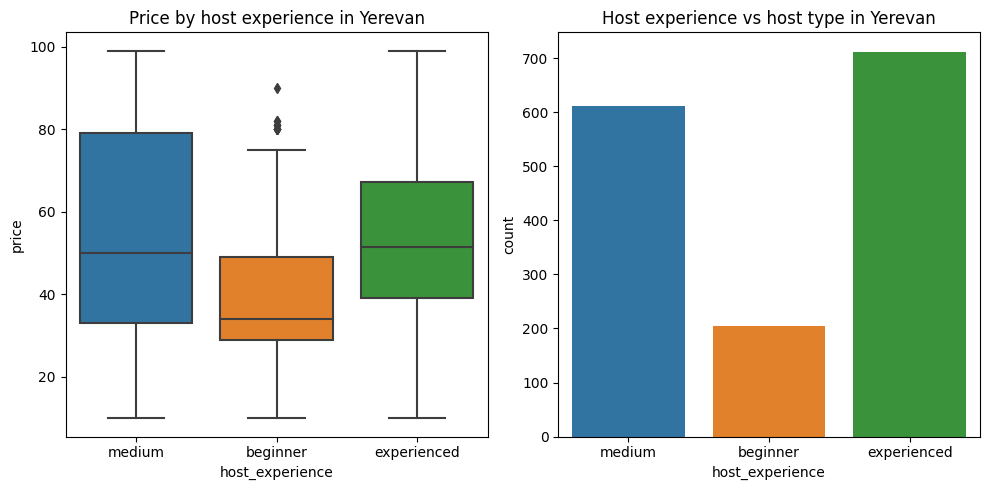

In [27]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the box plot
sns.boxplot(data=full_data_Yerevan, x='host_experience', y='price', ax=ax1)
ax1.set_title('Price by host experience in Yerevan')

# Plot the count plot
sns.countplot(data=full_data_Yerevan, x='host_experience', ax=ax2)
ax2.set_title('Host experience vs host type in Yerevan')

# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

In [28]:
#making the month a numerical value

full_data_Yerevan['host_responsivness'] = np.where(full_data_Yerevan['host_response_rate']<= 85,'80-85',
                         np.where(full_data_Yerevan['host_response_rate']< 90,'85-90',
                                  np.where(full_data_Yerevan['host_response_rate']< 95,'90-95','95-100')))

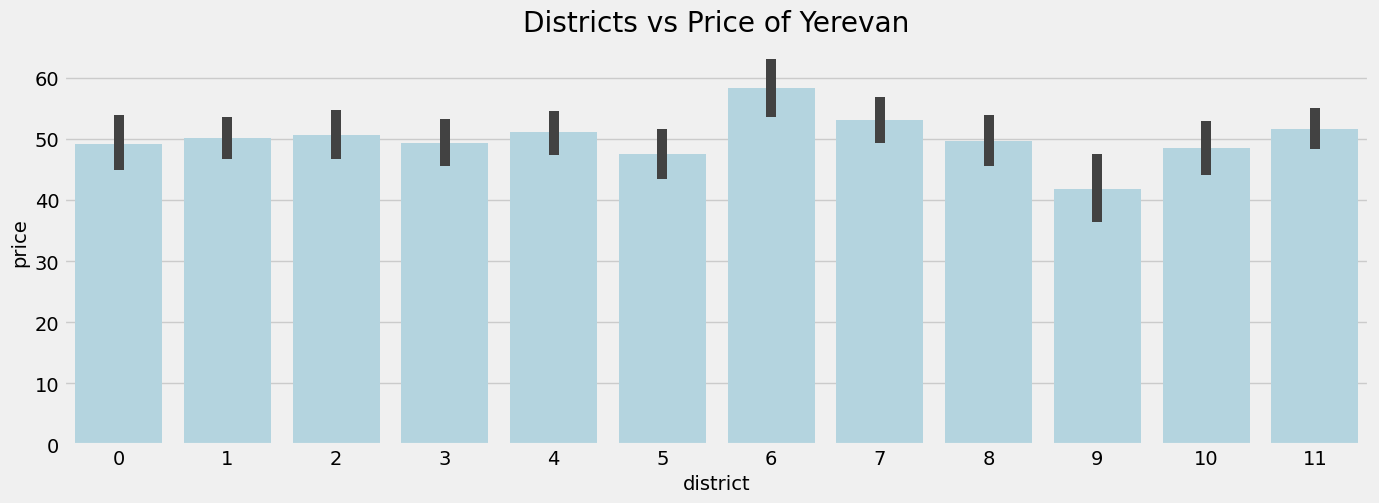

In [453]:
# plot the avg age per job depending on the contact type
plt.figure(figsize = (15,5))
sns.barplot(x = 'district', y = 'price', data = full_data_Yerevan, color='lightblue')
plt.title('Districts vs Price of Yerevan')
plt.show()

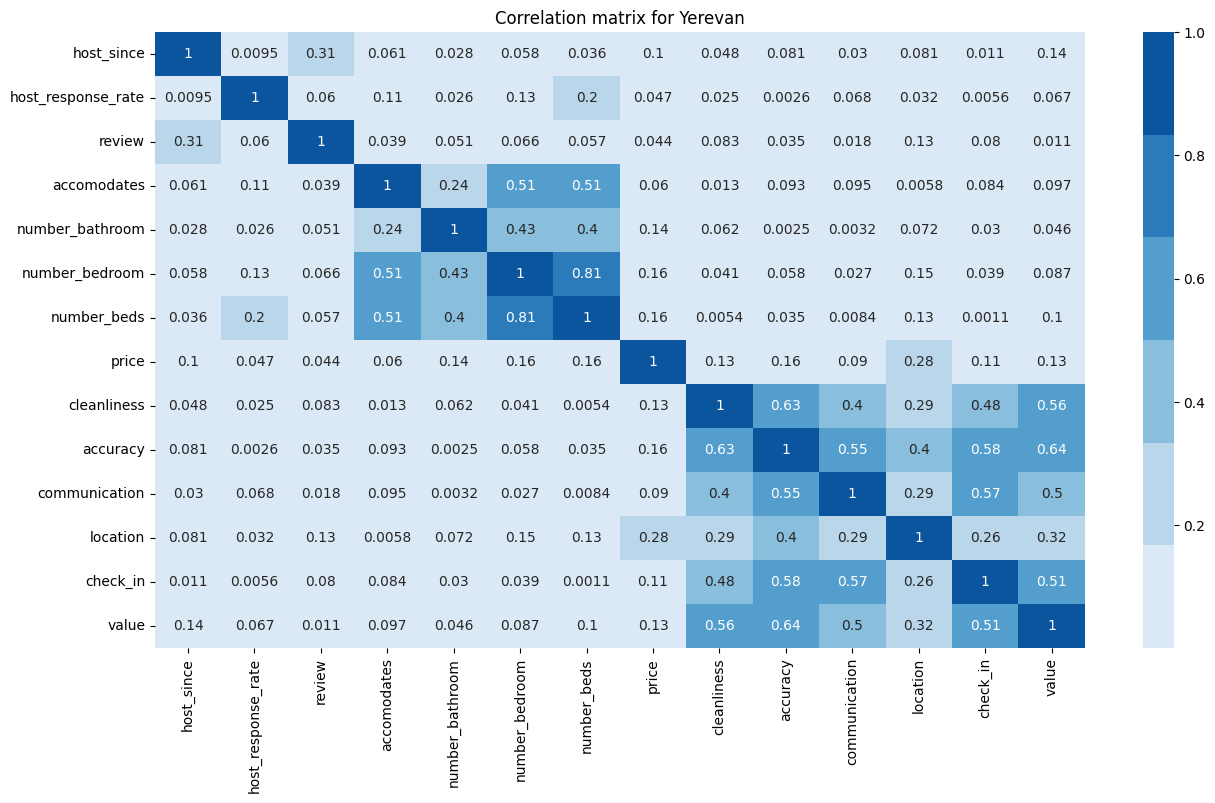

In [60]:
#the correlation map of the data (in abs values) (numeric values)
 
plt.figure(figsize = (15,8))
color_palettemap = sns.color_palette("Blues")
sns.heatmap(full_data_Yerevan.corr().abs(), annot=True, cmap = color_palettemap)

plt.title('Correlation matrix for Yerevan')
plt.show();

In [205]:
# separate numeric and object parts 

data_num_Yerevan = full_data_Yerevan.select_dtypes(exclude = ["object"])
data_obj_Yerevan = full_data_Yerevan.select_dtypes(include = ["object"])

# Modeling Yerevan

In [151]:
categorical_label_encoder = LabelEncoder()

full_data_Yerevan["district"] = categorical_label_encoder.fit_transform(full_data_Yerevan["district"])
full_data_Yerevan["host_identity_verified"] = categorical_label_encoder.fit_transform(full_data_Yerevan["host_identity_verified"])
full_data_Yerevan["superhost"] = categorical_label_encoder.fit_transform(full_data_Yerevan["superhost"])
full_data_Yerevan["property_type"] = categorical_label_encoder.fit_transform(full_data_Yerevan["property_type"])
full_data_Yerevan["host_experience"] = categorical_label_encoder.fit_transform(full_data_Yerevan["host_experience"])
full_data_Yerevan["host_responsivness"] = categorical_label_encoder.fit_transform(full_data_Yerevan["host_responsivness"])

In [152]:
full_data_Yerevan = full_data_Yerevan.drop(['country'], axis = 1)

In [153]:
full_data_Yerevan = full_data_Yerevan.drop(['city'], axis = 1)

In [154]:
full_data_Yerevan.columns

Index(['district', 'host_since', 'host_response_rate',
       'host_identity_verified', 'review', 'superhost', 'property_type',
       'accomodates', 'number_bathroom', 'number_bedroom', 'number_beds',
       'price', 'cleanliness', 'accuracy', 'communication', 'location',
       'check_in', 'value', 'host_experience', 'host_responsivness'],
      dtype='object')

In [155]:
data_num_Yerevan

,host_since,host_response_rate,review,accomodates,number_bathroom,number_bedroom,number_beds,price,cleanliness,accuracy,communication,location,check_in,value
0,4,100,97,2,1.0,1,1,34,4.7,4.6,4.9,4.7,4.9,4.5
1,1,100,4,4,1.0,2,2,52,5.0,5.0,5.0,4.0,4.8,5.0
2,4,100,97,2,1.0,0,1,33,5.0,4.6,4.9,4.5,4.8,4.5
3,1,100,11,4,1.0,1,1,40,4.4,5.0,5.0,4.6,4.9,4.4
4,8,100,4,3,1.0,2,2,25,3.8,4.0,4.0,3.8,4.5,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,3,100,2,5,1.0,2,3,11,4.8,4.7,4.9,4.8,4.9,4.7
1523,1,94,31,4,1.0,1,2,43,4.1,4.3,4.6,5.0,4.8,4.4
1524,4,100,21,3,1.0,0,2,36,5.0,4.9,5.0,4.8,5.0,4.8
1525,8,100,75,2,1.0,1,1,65,4.7,4.9,4.8,4.9,4.8,5.0


In [206]:
data_num_Yerevan = data_num_Yerevan.drop(['accomodates'], axis = 1)
data_num_Yerevan = data_num_Yerevan.drop(['number_bedroom'], axis = 1)
data_num_Yerevan = data_num_Yerevan.drop(['value'], axis = 1)
data_num_Yerevan = data_num_Yerevan.drop(['check_in'], axis = 1)
data_num_Yerevan = data_num_Yerevan.drop(['accuracy'], axis = 1)

In [207]:
X = data_num_Yerevan.drop(['price'], axis = 1)
y = data_num_Yerevan['price'].values

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [209]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [83]:
max_depth_param_list = np.arange(2, 25)
score_results_rf = []

for depth in max_depth_param_list:
    rf_reg = RandomForestRegressor(max_depth = depth, max_features = 3, n_estimators = 8)
    kfold = KFold(n_splits=15)
    score = cross_val_score(rf_reg, X_train_scaled, y_train, cv = kfold) # default scoring is R^2
    score_results_rf.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.15793437107735744 
max_depth val: 3, CV Score Avg: 0.23326728198472832 
max_depth val: 4, CV Score Avg: 0.2884223545031601 
max_depth val: 5, CV Score Avg: 0.38174335956938027 
max_depth val: 6, CV Score Avg: 0.45111303318781615 
max_depth val: 7, CV Score Avg: 0.5192781181185784 
max_depth val: 8, CV Score Avg: 0.5719294923966042 
max_depth val: 9, CV Score Avg: 0.6363557718729939 
max_depth val: 10, CV Score Avg: 0.6830112439902087 
max_depth val: 11, CV Score Avg: 0.7151391589842662 
max_depth val: 12, CV Score Avg: 0.7404789498515357 
max_depth val: 13, CV Score Avg: 0.7408238934002979 
max_depth val: 14, CV Score Avg: 0.7224905831777267 
max_depth val: 15, CV Score Avg: 0.749053993292089 
max_depth val: 16, CV Score Avg: 0.7472457896729531 
max_depth val: 17, CV Score Avg: 0.7515238510386968 
max_depth val: 18, CV Score Avg: 0.7397385880733041 
max_depth val: 19, CV Score Avg: 0.745392310975981 
max_depth val: 20, CV Score Avg: 0.7520320416907798 

In [84]:
rf_avg_cv_scores = np.mean(np.array(score_results_rf), axis = 1)
rf_max_avg_accuracy_index = np.argmax(rf_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[rf_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 23


In [85]:
mod_rf_reg = RandomForestRegressor(max_depth = max_depth_param_list[rf_max_avg_accuracy_index], oob_score = True)
mod_rf_reg_fit = mod_rf_reg.fit(X_train_scaled,y_train)
model_rf_score = mod_rf_reg_fit.score(X_test_scaled,y_test)
print("Model Score on test set: %s" % model_rf_score)

Model Score on test set: 0.7112501397364097


In [94]:
import numpy as np
 
importances = mod_rf_reg_fit.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns[0:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


 1) review                         0.267439
 2) location                       0.199110
 3) host_since                     0.152861
 4) cleanliness                    0.117897
 5) number_beds                    0.093909
 6) number_bathroom                0.065563
 7) communication                  0.063160
 8) host_response_rate             0.040062


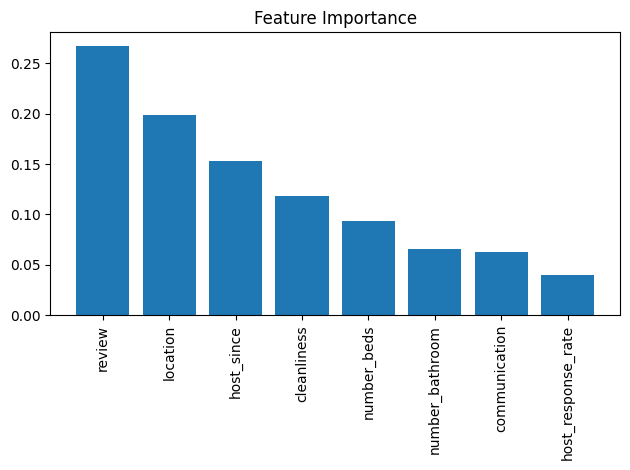

In [95]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [113]:
import numpy as np
 
importances = mod_rf_reg_fit.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns[0:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


 1) review                         0.208050
 2) number_bedroom                 0.162307
 3) host_since                     0.099219
 4) value                          0.090701
 5) cleanliness                    0.083618
 6) number_bathroom                0.070583
 7) accomodates                    0.065592
 8) check_in                       0.058165
 9) location                       0.052722
10) number_beds                    0.037901
11) accuracy                       0.029114
12) communication                  0.026340
13) host_response_rate             0.015687


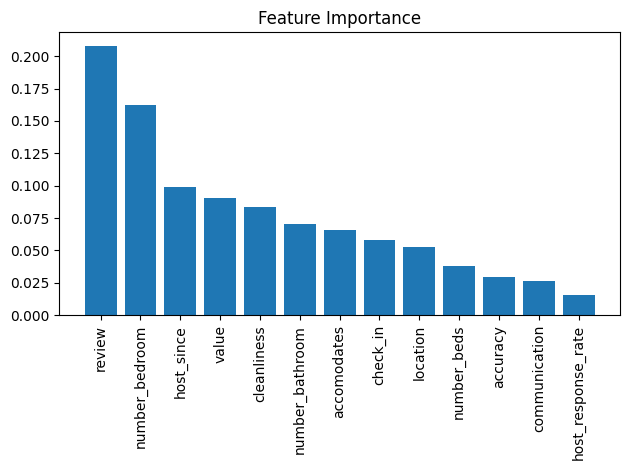

In [114]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# OLS on Yerevan listings

In [172]:
# separate numeric and object parts 

data_num_Yerevan = full_data_Yerevan.select_dtypes(exclude = ["object"])
data_obj_Yerevan = full_data_Yerevan.select_dtypes(include = ["object"])

In [132]:
# dummy 

data_dummies = pd.get_dummies(data_obj_Yerevan, drop_first = True)
data_dummies.head()

,district_Arabkir,district_Avan,district_Davtashen,district_Erebuni,district_Kanaker-Zeytun,district_Kentron,district_Malatia,district_Nor-Nork,district_Nork_Marash,district_Nubarashen,...,property_type_Entire vacation home,property_type_Entire villa,property_type_Hostel,property_type_Hotel,property_type_Place to stay in a bed and breakfast,host_experience_experienced,host_experience_medium,host_responsivness_85-90,host_responsivness_90-95,host_responsivness_95-100
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [133]:
data_model = data_num_Yerevan.join(data_dummies, how = 'left')

In [147]:
Y = data_model.price
X = data_model.drop('price', axis = 1)
X = sm.add_constant(X)

In [148]:
# train test split data 

X0, X1, Y0, Y1 = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [149]:
# linear model 

model_linear = sm.OLS(Y0, X0)
results = model_linear.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     8.161
Date:                Mon, 15 May 2023   Prob (F-statistic):           5.47e-51
Time:                        14:18:03   Log-Likelihood:                -5051.5
No. Observations:                1145   AIC:                         1.021e+04
Df Residuals:                    1089   BIC:                         1.050e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                -40.5678     25.075     -1.618      0.106     -89.769       8.634
host_since                                             0.2829      0.610      0.464      0.643      -0.914       1.480
host_response_rate                                    -0.3255      0.101     -3.211      0.001      -0.524      -0.127
review                                                -0.0202      0.006     -3.544      0.000      -0.031      -0.009
accomodates                                           -0.7217      0.581     -1.242      0.214      -1.862       0.418
number_bathroom                                       -6.3080      1.655     -3.812      0.000      -9.555      -3.061
number_bedroom                                         2.5690      1.281      2.005      0.045       0.055       5.083
number_beds                                           -3.2091      0.861     -3.725      0.000      -4.899      -1.519
cleanliness                                           -5.4955      4.312     -1.274      0.203     -13.957       2.966
accuracy                                              12.0716      6.348      1.902      0.057      -0.385      24.528
communication                                        -15.5616      5.357     -2.905      0.004     -26.073      -5.050
location                                              14.3365      2.911      4.924      0.000       8.624      20.049
check_in                                               5.7580      5.369      1.072      0.284      -4.777      16.293
value                                                 10.5682      4.008      2.637      0.008       2.705      18.432
district_Arabkir                                       2.3451      2.863      0.819      0.413      -3.272       7.962
district_Avan                                          1.0155      3.036      0.335      0.738      -4.941       6.972
district_Davtashen                                    -0.6444      3.045     -0.212      0.832      -6.620       5.331
district_Erebuni                                       4.2225      2.894      1.459      0.145      -1.456       9.901
district_Kanaker-Zeytun                                3.0080      3.013      0.998      0.318      -2.904       8.920
district_Kentron                                       4.1055      3.144      1.306      0.192      -2.064      10.275
district_Malatia                                       3.7511      3.039      1.234      0.217      -2.211       9.713
district_Nor-Nork                                      1.6547      3.105      0.533      0.594      -4.437       7.747
district_Nork_Marash                                   2.5597      4.976      0.514      0.607      -7.204  

In [150]:
y_pred=results.predict(X1)
print('R^2_test:', r2_score(Y1, y_pred))
print('RMSE_test:', mean_squared_error(Y1, y_pred)**0.5)
print('RMSE_train:', mean_squared_error(Y0, results.fittedvalues)**0.5)

R^2_test: 0.14607042351876454
RMSE_test: 21.73903664574723
RMSE_train: 19.942228133800874


In [591]:
X_train

,host_since,host_response_rate,host_identity_verified,review,superhost,property_type,accomodates,number_bathroom,number_bedroom,number_beds,cleanliness,accuracy,communication,location,check_in,value,host_experience,host_responsivness
159,9,100.0,1,149,0,5,4,1.0,2,2.0,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,1,3
76,0,100.0,1,7,0,5,4,1.0,2,2.0,4.878082,4.913699,4.930137,4.893607,4.915068,4.857534,2,3
59,11,90.0,1,137,0,5,4,1.0,2,2.0,4.800000,4.900000,4.900000,5.000000,4.900000,4.800000,1,2
215,4,100.0,1,39,0,5,3,1.0,1,1.0,5.000000,4.900000,5.000000,5.000000,5.000000,5.000000,2,3
232,6,100.0,1,619,0,5,2,1.5,1,1.0,4.900000,5.000000,5.000000,5.000000,5.000000,4.900000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,4,100.0,1,25,1,5,2,1.0,1,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,2,3
192,0,90.0,1,9,1,5,2,1.0,1,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2,2
117,8,100.0,1,104,1,5,2,1.0,1,2.0,4.800000,4.900000,5.000000,4.700000,4.900000,4.800000,1,3
47,10,100.0,1,667,0,5,4,1.0,2,2.0,5.000000,5.000000,5.000000,4.600000,5.000000,5.000000,1,3


In [600]:
X_train.district.value_counts()

1     134
4     129
7     119
11    115
5     114
2     108
6     103
3      97
8      94
0      89
10     83
9      36
Name: district, dtype: int64

In [315]:
X_train.district.value_counts()

Arabkir           134
Erebuni           129
Malatia           119
Shengavit         115
Kanaker-Zeytun    114
Avan              108
Kentron           103
Davtashen          97
Nor-Nork           94
Ajapniak           89
Nubarashen         83
Nork_Marash        36
Name: district, dtype: int64

In [358]:
X_train.property_type.value_counts()

Entire rental unit                      550
Entire rental unit  Inn Apartments      157
Entire condo                            137
Entire serviced apartment               114
Entire home                              97
Hotel                                    33
Entire loft                              19
Hostel                                   13
Entire villa                             12
Boutique hotel                           10
Entire rental unit  LLC                  10
Entire rental unit  Spaces                9
Entire townhouse                          9
Entire serviced apartment  Apart          8
Entire guesthouse                         8
Entire guest suite                        7
Entire rental unit  Martin                6
Place to stay in a bed and breakfast      5
Entire serviced apartment  Martin         4
Entire serviced apartment  Street         3
Entire serviced apartment  Service        3
Entire rental unit  Apartments            3
Entire vacation home            

In [424]:
X_train.property_type.value_counts()

6     550
8     157
1     137
14    114
4      97
23     33
5      19
22     13
21     12
0      10
9      10
12      9
19      9
15      8
3       8
2       7
10      6
24      5
16      4
18      3
17      3
7       3
20      2
11      2
Name: property_type, dtype: int64

In [745]:
Erebuni = {"district": [4], "host_since" : [3], "host_response_rate" : [95], "host_identity_verified" :[1],
      "review" : [2],  "superhost" : [1], "property_type" : [6], "accomodates" : [2], "number_bathroom" : [1],
       "number_bedroom" : [1],  "number_beds" : [1], "cleanliness" : [5], "accuracy" : [5.0], "communication": [5.0],
      "location" : [5.0],  "check_in" : [5.0],  "value" : [3] , "host_experience" : [4], "host_responsivness" :[3]}


In [746]:
Erebunid = pd.DataFrame(Erebuni)

In [747]:
Erebunid

,district,host_since,host_response_rate,host_identity_verified,review,superhost,property_type,accomodates,number_bathroom,number_bedroom,number_beds,cleanliness,accuracy,communication,location,check_in,value,host_experience,host_responsivness
0,4,3,95,1,2,1,6,2,1,1,1,5,5.0,5.0,5.0,5.0,3,4,3


In [748]:
mod_rf_reg_fit.predict(Nork_Marashd)

array([52.82609213])

In [827]:
Shengavit = {"district": [11], "host_since" : [3], "host_response_rate" : [95], "host_identity_verified" :[1],
      "review" : [2],  "superhost" : [1], "property_type" : [6], "accomodates" : [2], "number_bathroom" : [1],
       "number_bedroom" : [1],  "number_beds" : [1], "cleanliness" : [5], "accuracy" : [5.0], "communication": [5.0],
      "location" : [5.0],  "check_in" : [5.0],  "value" : [3] , "host_experience" : [4], "host_responsivness" :[3]}


In [828]:
Shengavitd = pd.DataFrame(Shengavit)

In [829]:
mod_rf_reg_fit.predict(Shengavitd)

array([55.31985404])

# Support Vector Regression (kernel='poly')

In [175]:
degree_grid = np.array([1,2,3,4])
c_param_grid = np.linspace(0.1, 50, 10)
epsilon_grid = np.linspace(0,1,10)


mod_svm_radial_reg = svm.SVR(kernel = "poly")
opt_mod_svm_radial_reg = GridSearchCV(mod_svm_radial_reg, 
                             param_grid = {'degree': degree_grid, 'C': c_param_grid, 'epsilon': epsilon_grid}, 
                             cv = 5)
opt_mod_svm_radial_reg_fit = opt_mod_svm_radial_reg.fit(X_train_scaled,y_train)
opt_mod_svm_radial_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='poly'),
             param_grid={'C': array([ 0.1       ,  5.64444444, 11.18888889, 16.73333333, 22.27777778,
       27.82222222, 33.36666667, 38.91111111, 44.45555556, 50.        ]),
                         'degree': array([1, 2, 3, 4]),
                         'epsilon': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [176]:
print("Model Best Estimator %s" % opt_mod_svm_radial_reg.best_estimator_)

Model Best Estimator SVR(C=5.644444444444444, degree=1, epsilon=0.4444444444444444, kernel='poly')


In [177]:
print("Model Best Params %s" % opt_mod_svm_radial_reg.best_params_)

Model Best Params {'C': 5.644444444444444, 'degree': 1, 'epsilon': 0.4444444444444444}


In [178]:
print("Model score %s" % opt_mod_svm_radial_reg.best_estimator_.score(X_test_scaled, y_test))

Model score 0.07973745595107418


In [179]:
print("Model score %s" % opt_mod_svm_radial_reg.best_estimator_.score(X_train_scaled, y_train))

Model score 0.09707501848362299


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Decision Tree regressor

In [180]:
from sklearn import tree
max_depth_param_list = np.arange(2, 8)
score_results_dt = []

for depth in max_depth_param_list:
    dt_reg = tree.DecisionTreeRegressor(max_depth = depth)
    kfold = KFold(n_splits=10)
    score = cross_val_score(dt_reg, X_train_scaled, y_train, cv = kfold) # default scoring is R^2
    score_results_dt.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.1400783723896275 
max_depth val: 3, CV Score Avg: 0.1943156611071634 
max_depth val: 4, CV Score Avg: 0.24413208900588385 
max_depth val: 5, CV Score Avg: 0.3340146888209758 
max_depth val: 6, CV Score Avg: 0.3934447609987033 
max_depth val: 7, CV Score Avg: 0.4399517931373804 


In [181]:
dt_avg_cv_scores = np.mean(np.array(score_results_dt), axis = 1)
dt_max_avg_accuracy_index = np.argmax(dt_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[dt_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 7


In [182]:
mod_dt_reg = tree.DecisionTreeRegressor(max_depth = max_depth_param_list[dt_max_avg_accuracy_index])
mod_dt_reg_fit = mod_dt_reg.fit(X_train_scaled,y_train)
model_dt_score = mod_dt_reg_fit.score(X_test_scaled,y_test)
print("Model Score on test set: %s" % model_dt_score)

Model Score on test set: 0.41979540580667485


#  Gradient Boosting Regressor

In [210]:
max_depth_param_list = np.arange(2, 12)
score_results_gb = []

for depth in max_depth_param_list:
    gb_reg = GradientBoostingRegressor(max_depth = depth)
    kfold = KFold(n_splits=10)
    score = cross_val_score(gb_reg, X_train_scaled, y_train, cv = 10) # default scoring is R^2
    score_results_gb.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.3524737072615346 
max_depth val: 3, CV Score Avg: 0.5274930141301267 
max_depth val: 4, CV Score Avg: 0.6539418642148471 
max_depth val: 5, CV Score Avg: 0.7180131082381759 
max_depth val: 6, CV Score Avg: 0.7496984664712578 
max_depth val: 7, CV Score Avg: 0.759889897823232 
max_depth val: 8, CV Score Avg: 0.768730224418988 
max_depth val: 9, CV Score Avg: 0.7635759598982832 
max_depth val: 10, CV Score Avg: 0.7568285697209203 
max_depth val: 11, CV Score Avg: 0.7530942682768968 


In [215]:
gb_avg_cv_scores = np.mean(np.array(score_results_gb), axis = 1)
gb_max_avg_accuracy_index = np.argmax(gb_avg_cv_scores) 
print("Optimal max_depth value using CV: %s" % max_depth_param_list[gb_max_avg_accuracy_index]) 

Optimal max_depth value using CV: 8


In [217]:
mod_gb_reg = GradientBoostingRegressor(max_depth = max_depth_param_list[gb_max_avg_accuracy_index])
mod_gb_reg_fit = mod_gb_reg.fit(X_train_scaled,y_train)
model_gb_score = mod_gb_reg_fit.score(X_test_scaled,y_test)
print("Model Score on test set: %s" % model_gb_score)

Model Score on test set: 0.7086826797259513


In [219]:
import numpy as np
 
importances = mod_gb_reg_fit.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns[0:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))


 1) review                         0.281047
 2) location                       0.188263
 3) cleanliness                    0.149314
 4) host_since                     0.139741
 5) number_beds                    0.088904
 6) communication                  0.062867
 7) host_response_rate             0.048613
 8) number_bathroom                0.041252


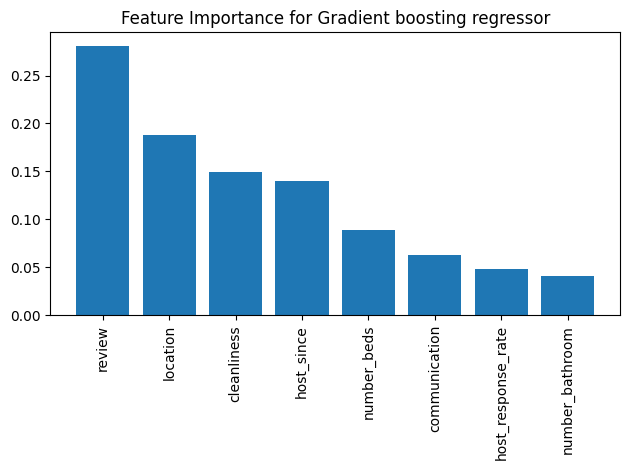

In [221]:
plt.title('Feature Importance for Gradient boosting regressor for Yerevan')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

# Ada Boost Regressor

In [186]:
max_depth_param_list = np.arange(2, 22)
score_results_ab = []

for depth in max_depth_param_list:
    ab_reg = AdaBoostRegressor(tree.DecisionTreeRegressor(
        max_depth = depth), n_estimators = 500, learning_rate = 1)
    kfold = KFold(n_splits=10)
    score = cross_val_score(ab_reg, X_train_scaled, y_train, cv = kfold) # default scoring is R^2
    score_results_ab.append(score)
    print("max_depth val: %s, CV Score Avg: %s " % (depth, np.mean(score)))

max_depth val: 2, CV Score Avg: 0.15465508733086564 
max_depth val: 3, CV Score Avg: 0.22219030788855593 
max_depth val: 4, CV Score Avg: 0.32384586868041376 
max_depth val: 5, CV Score Avg: 0.43365783006635555 
max_depth val: 6, CV Score Avg: 0.5244814426215082 
max_depth val: 7, CV Score Avg: 0.606954326669541 
max_depth val: 8, CV Score Avg: 0.6531906024821528 
max_depth val: 9, CV Score Avg: 0.6865559030752053 
max_depth val: 10, CV Score Avg: 0.7058800153221176 
max_depth val: 11, CV Score Avg: 0.7056774926475116 
max_depth val: 12, CV Score Avg: 0.6934274216058043 
max_depth val: 13, CV Score Avg: 0.703636215512683 
max_depth val: 14, CV Score Avg: 0.7028828901940292 
max_depth val: 15, CV Score Avg: 0.7072434728396706 
max_depth val: 16, CV Score Avg: 0.7183241012184377 
max_depth val: 17, CV Score Avg: 0.713661262334325 
max_depth val: 18, CV Score Avg: 0.6991287303074943 
max_depth val: 19, CV Score Avg: 0.7104181289947663 
max_depth val: 20, CV Score Avg: 0.7186356823326723 


In [190]:
mod_ab_reg = AdaBoostRegressor(tree.DecisionTreeRegressor(max_depth = max_depth_param_list[
    ab_max_avg_accuracy_index]), n_estimators = 400, learning_rate = 1)
mod_ab_reg_fit = mod_ab_reg.fit(X_train_scaled,y_train)
model_ab_score = mod_ab_reg_fit.score(X_test_scaled,y_test)
print("Model Score on test set: %s" % model_ab_score)

Model Score on test set: 0.7022869509415828
